## Análise Exploratória - parte 1
### Artigo https://arxiv.org/abs/2001.04689
Replicando o artigo usando o dataset: https://www.physionet.org/content/ludb/1.0.1/

In [1]:
# Import libraries
import wfdb
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

# set matplotlib to plot in the notebook
%matplotlib inline

O dataset tem as 12 derivações do ECG separadas, cada uma com 10 segundos de duração, amostradas a 500 Hz.

Sendo assim, vamos definir algumas contantes para usar no código:

- Derivações do ECG
- Localização dos dados
- Cores das ondas para plotar
- Tamanho da entrada do modelo de ECG

In [2]:
# Derivações
LEADS = ['avf', 'avl', 'avr', 'i', 'ii', 'iii', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']

# Local do dataset

DATA_FOLDER = "C:\\Users\\estela.ribeiro\\JupyterNotebooks\\ECGcodes\\datasets\\lobachevsky-university-electrocardiography-database-1.0.1\\data"

# Cores das ondas para plotar
SEGMENT_TO_COLOR = {
    'p': 'red',
    'N': 'blue',
    't': 'green',
}

# Dimensão da entrada do modelo
ECG_SIZE = 41*16 # -> 32*16 = 512

In [3]:
def get_signal(index: int):
    # Lê o sinal de ECG de um determinado index
    record = wfdb.rdrecord(DATA_FOLDER + '/' + str(index)) # wfdb.io.record.Record
    
    return record.p_signal # numpy.ndarray

In [4]:
record = get_signal(10)

print(record.shape, type(record))

(5000, 12) <class 'numpy.ndarray'>


In [5]:
def get_annotations(index:int, lead):
    # Lê as anotações do ECG para uma determinada derivação (lead)
    annotations = wfdb.rdann(DATA_FOLDER + '/' + str(index), extension = lead) # wfdb.io.annotation.Annotation

    return np.array(annotations.sample) # array

In [6]:
ann = get_annotations(10, 'v6')

print(ann, type(ann))

[ 680  701  746  803  851  886 1072 1091 1131 1168 1187 1230 1284 1337
 1386 1547 1576 1606 1647 1668 1711 1763 1817 1855 2029 2053 2092 2128
 2149 2192 2242 2299 2340 2538 2551 2579 2624 2644 2684 2741 2792 2835
 3012 3044 3071 3113 3137 3180 3242 3286 3324 3510 3537 3570 3609 3630
 3673 3725 3780 3820 3995 4019 4053 4094 4113 4159] <class 'numpy.ndarray'>


In [7]:
def get_full_ecg(index:int):
    # Forma o ECG de um sujeito com todos os sinais e anotações
    signal = get_signal(index)
    annotations = [get_annotations(index, lead) for lead in LEADS]

    return signal, annotations

In [8]:
def plot_signal_with_annotation(index):
    # Plotar um exame completo de ECG
    signal, samples = get_full_ecg(index)
    # extract sample from annotations
    wfdb.plot_items(signal, samples)

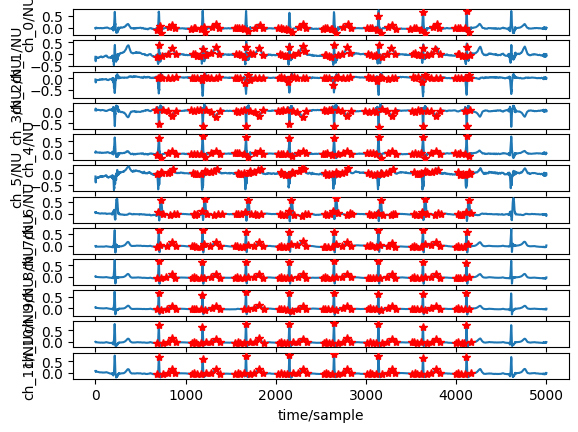

In [9]:
plot_signal_with_annotation(10)

In [10]:
def get_annotations_symbols(index:int, lead):
    # Lê as anotações do ECG para uma determinada derivação (lead)
    annotations = wfdb.rdann(DATA_FOLDER + '/' + str(index), extension = lead) # wfdb.io.annotation.Annotation

    return annotations.symbol

In [11]:
symbols = get_annotations_symbols(10, 'v6')
print(symbols)

['(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')']


In [12]:
def get_single_lead_ecg(index, lead):
    # Retorna UMA derivação do sinal de ECG e sua anotação
    signal = get_signal(index)
    annotation = get_annotations(index, lead)

    return signal, annotation

In [13]:
sig, anno = get_single_lead_ecg(10, 'v6')

### Cada derivação do sinal de ECG é dividida em 3 partes:

- O sinal [0.3, 0.5, ..., 0.2]
- Os simbolos das anotações ['(', 'N', ')', '(', 't', ')', '(', 'p', ')']
- Os pontos no tempo em que cada anotação é registrado [680, 701, ..., 4159]

In [14]:
def from_index_and_lead(index, lead):
    # Initialize the signal from index and lead
    signal = get_signal(index)[:, LEADS.index(lead)]
    time_points = get_annotations(index, lead)
    symbols = get_annotations_symbols(index, lead)
    return signal, time_points, symbols

In [15]:
signal, time_points, symbols = from_index_and_lead(10, 'v6')
print(signal, time_points, symbols)

[ 0.08602151  0.06286187  0.06534326 ... -0.03391232 -0.02315964
  0.00082713] [ 680  701  746  803  851  886 1072 1091 1131 1168 1187 1230 1284 1337
 1386 1547 1576 1606 1647 1668 1711 1763 1817 1855 2029 2053 2092 2128
 2149 2192 2242 2299 2340 2538 2551 2579 2624 2644 2684 2741 2792 2835
 3012 3044 3071 3113 3137 3180 3242 3286 3324 3510 3537 3570 3609 3630
 3673 3725 3780 3820 3995 4019 4053 4094 4113 4159] ['(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')']


In [17]:
"""
Generator that allows to iterate over a list, grouping the elements in groups of n.
Example:
    >>> list(grouped([1,2,3,4,5,6,7,8,9], n=3))
    [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
"""
def grouped(itr, n=3):
    itr = iter(itr)
    end = object()
    while True:
        vals = tuple(next(itr, end) for _ in range(n))
        if vals[-1] is end:
            return
        yield vals

In [18]:
for start, symbol, end in grouped(time_points, 3):
    i = np.nonzero(time_points == symbol)[0][0]
    current_symbol = symbols[i]
    print(f'start: {start}, symbol: {symbol},  end: {end}, current_symbol: {current_symbol}')
    break

start: 680, symbol: 701,  end: 746, current_symbol: N


In [19]:
def plot_signal_with_segments(signal, time_points, symbols):
    # Plot the ECG signal with different segments highlighted based on annotations
    fig, ax = plt.subplots(figsize=(28, 3))
    ax.plot(signal)
    for start, symbol, end in grouped(time_points, 3):
        i = np.nonzero(time_points == symbol)[0][0]
        current_symbol = symbols[i]
        color = SEGMENT_TO_COLOR.get(current_symbol, 'gray')  # Default color to gray if symbol not found
        ax.axvspan(start, end, color=color, alpha=0.4)

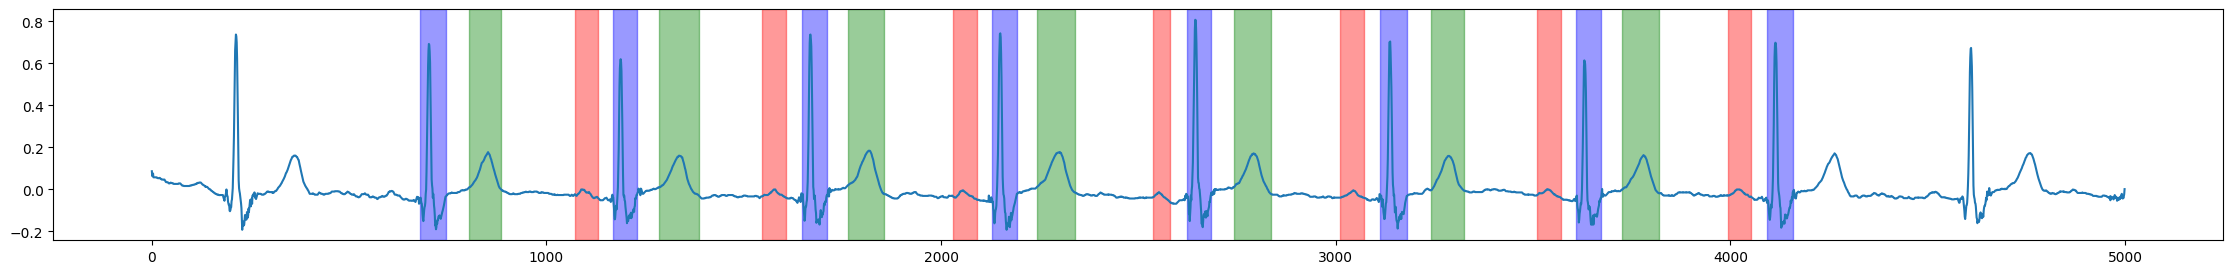

In [20]:
plot_signal_with_segments(signal, time_points, symbols)

In [21]:
symbol_to_category = {'N': 0,'t': 1,'p': 2}
category_to_symbol = {0: 'N', 1: 't', 2: 'p'}

In [22]:
def symbols_to_category(signal, time_points, symbols):
    # Convert symbols into categories (integers)
    category = np.full(len(signal), -1)
    for section in grouped(time_points):
        start, peak, end = section
        i = np.nonzero(time_points == peak)[0][0]
        current_symbol = symbols[i]
        category[start:end] = {'N': 0, 't': 1, 'p': 2}.get(current_symbol, -1)  # Default to -1 if symbol not found
    return category

In [23]:
def cut_signal(signal, time_points, symbols, start_point=550, end_point=3500):
    # Cut the signal at the beginning and end based on specified points
    signal = signal[start_point:end_point]
    time_points = time_points - start_point
    if symbols[0] == ')':
        symbols = ['('] + [category_to_symbol[category[0]]] + symbols
        time_points = np.concatenate(([0, 1], time_points))
    elif symbols[0] in symbol_to_category:
        symbols = ['('] + symbols
        time_points = np.concatenate(([0], time_points))
    index = time_points[time_points < signal.size].size
    time_points = time_points[:index]
    symbols = symbols[:index]
    if symbols[-1] == '(':
        symbols = symbols + [category_to_symbol[category[-1]]] + [')']
        time_points = np.concatenate((time_points, [signal.size - 1, signal.size]))
    elif symbols[-1] in symbol_to_category:
        symbols = symbols + [')']
        time_points = np.concatenate((time_points, [signal.size]))
    return signal, time_points, symbols

In [24]:
cut_signal, cut_time_points, cut_symbols = cut_signal(signal, time_points, symbols)

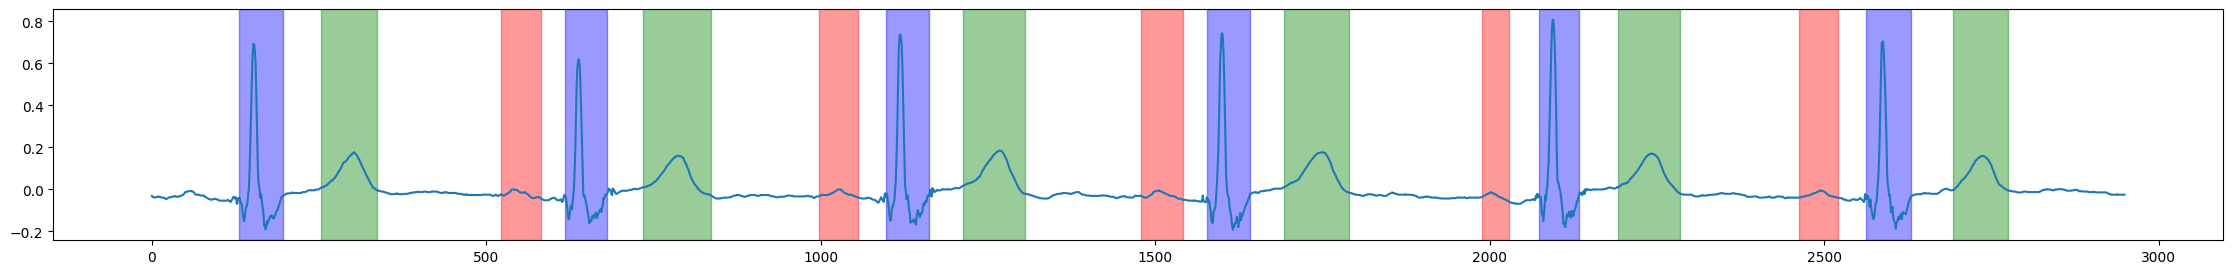

In [25]:
plot_signal_with_segments(cut_signal, cut_time_points, cut_symbols)